# HW4 ASSIGNMENT 1 - Distributions

In [148]:
import pylab as pl
import numpy as np
from scipy import stats
import json
import os


from __future__ import print_function
__author__= 'mbh329'

import seaborn # data visualization package
from scipy.optimize import curve_fit, minimize 
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Chi - Square Distribution

In [149]:
# distributions used ['chisq', normal', 'pois', 'gaus', 'binomial', "geometric"]
distributions = ['chisq']

In [150]:
mymean = 100

In [151]:
# fedhere: "the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!"
df = mymean

In [152]:
# added my packages at the top. always add packages at the top 
md = {}
# md is an empty disctionary
#md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
#pl.hist(md['chisq'], bins = 30)
#pl.ylabel('N')
#pl.xlabel('x')

Figure1: N = 100, df = 100

In [153]:
#print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

In [154]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


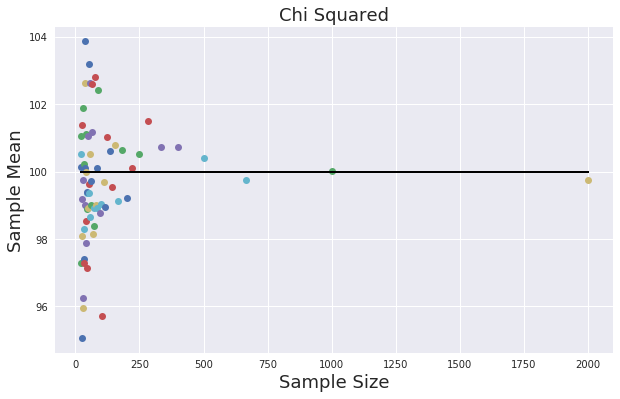

In [155]:
md['chisq'] = {} # creating a nested dictionary from the orignal 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

# Now we are going to save the means in a dictionary 

md['chisq']['means'] = {} # This is the dictionary - "mydictionary/chisq/means" - thats what we are doing
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)


for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Chi Squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 2: In this figure, we have plotted 100 distributions with a random sample size (10-2000) as the x variable against the sample mean (mean = 100) as the y variable.  We see that as the sample size increases (x variale) the mean (y variable) of the sample size gets closer to the the expected value. This would be in line with the law of large numbers that states that over a large number of trials, we should see that as the trials go on we get closer to the expected value. 


Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


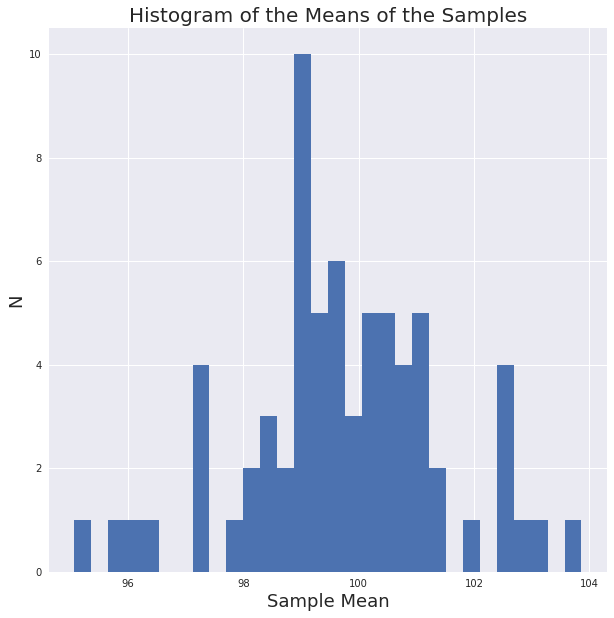

In [156]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 3: In this figure, we see that there is a positive correlation with the bell shaped curve. This supports the Central Limit Theorem. 

# Normal Distribution 

In [157]:
distributions = ['normal']

In [158]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


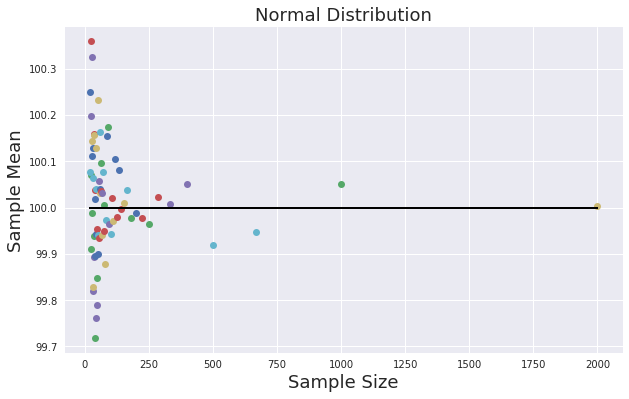

In [159]:
md['normal'] = {} # creating a nested dictionary from the orignal 

for n in mysize:
    md['normal'][n] = np.random.normal(loc=mymean, size=n)
    
md['normal']['means'] = {} # This is the dictionary - "mydictionary/chisq/means" - thats what we are doing
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)


for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

    

Figure 1: In this figure, we see that the distribution is normally distributed. As the sample size increases, the mean gets closer to the expected value. This supports the Central Limit Theorem. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


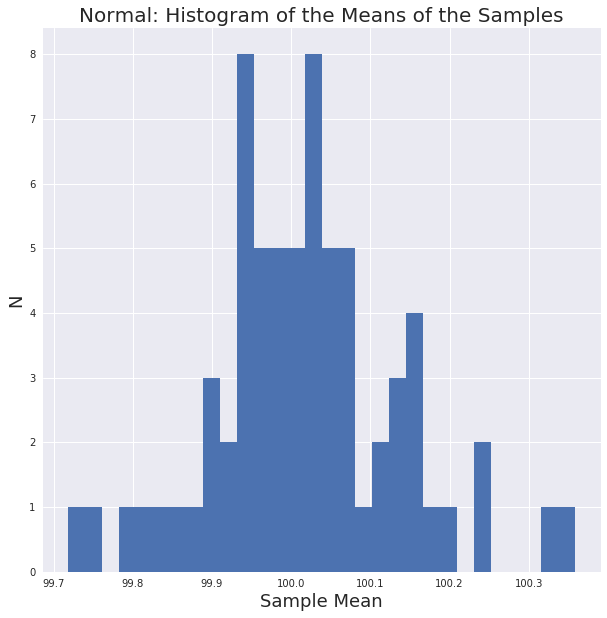

In [160]:
allmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Normal: Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2: In this figure, we see a normal distribution which follows a bell shaped curve. This is supported by the CLT.


# Poisson Distribution

In [161]:
distributions = ['poisson']

In [162]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


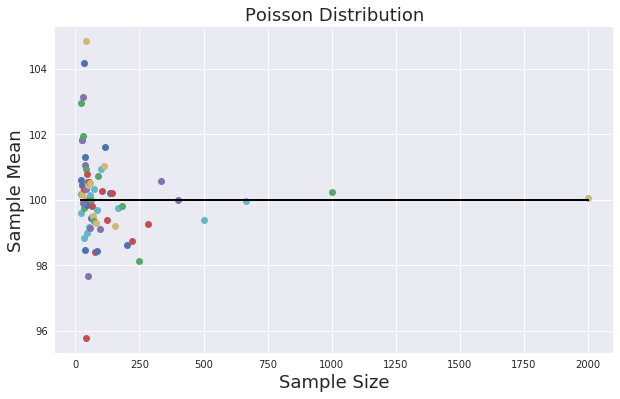

In [163]:
md['poisson'] = {} # creating a nested dictionary from the orignal 

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam=mymean, size=n)

md['poisson']['means'] = {} # This is the dictionary - "mydictionary/chisq/means" - thats what we are doing
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)


for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


    

Figure 1: In this figure, we see the poisson distribution which follows a standard bell shape curve. This supports the CLT.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


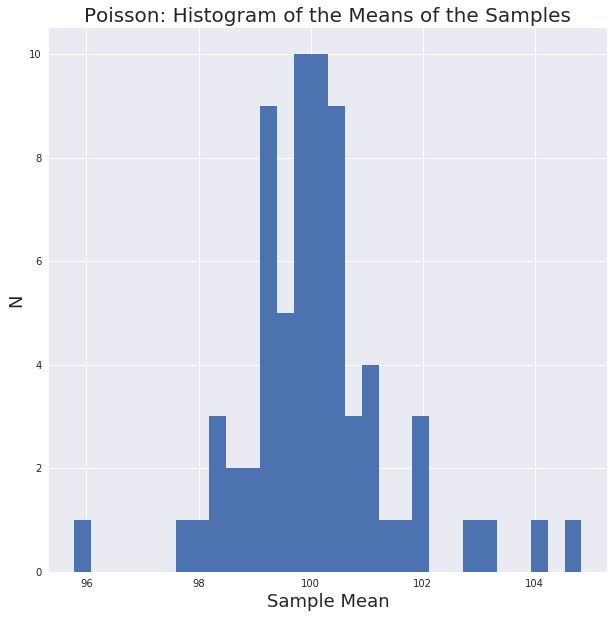

In [164]:
allmeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Poisson: Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2: In this histogram, we see a different visual of the same poisson distribution from above; supporting the CLT.

# Binomial Distribution

In [165]:
distributions = ['binomial']

In [166]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


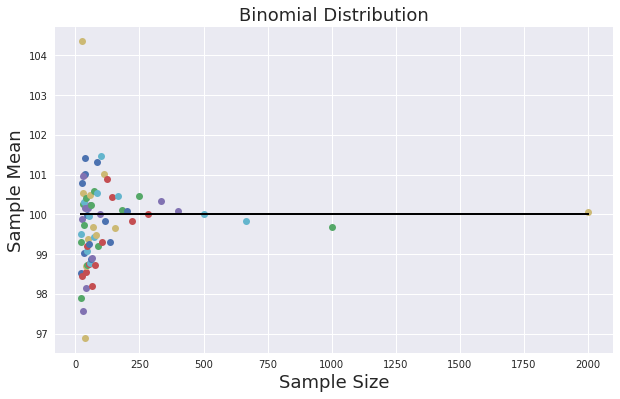

In [167]:
md['binomial'] = {} # creating a nested dictionary from the orignal 

for n in mysize:
    md['binomial'][n] = np.random.binomial(n=200, p = 0.5, size= n)

md['binomial']['means'] = {} # This is the dictionary - "mydictionary/chisq/means" - thats what we are doing
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)


for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')



Figure 1: In this figure, a binomial distribution is shown that follows a bell shaped curve which is spread out a little bit farther than previous examples. This still supports the CLT.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


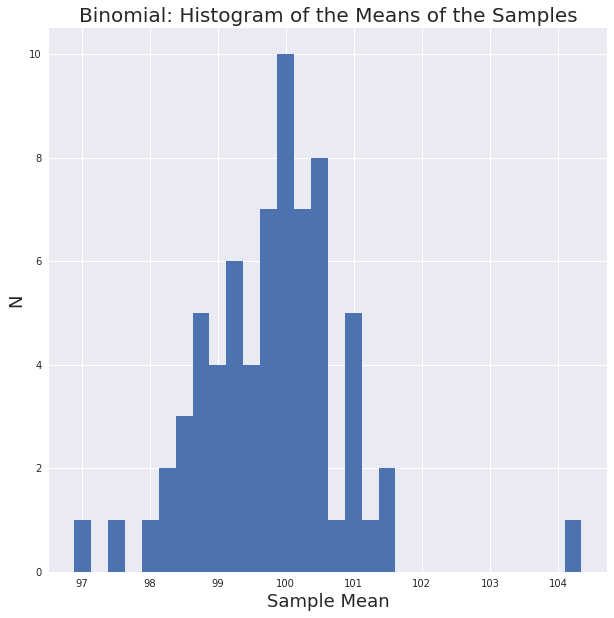

In [168]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Binomial: Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2: This histogram is another visulization of the Binomial distribution above. 

# Geometric Distribution 

In [169]:
distribution = ['geometric']

In [170]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


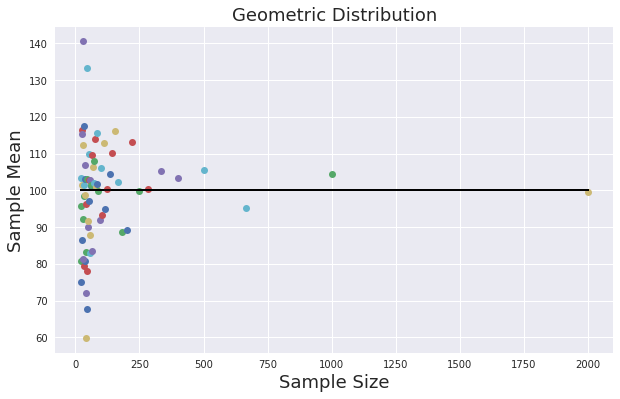

In [171]:
md['geometric'] = {} # creating a nested dictionary from the orignal 

for n in mysize:
    md['geometric'][n] = np.random.geometric(p=1/100, size=n)

md['geometric']['means'] = {} # This is the dictionary - "mydictionary/chisq/means" - thats what we are doing
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)


for nn in md['geometric']:
    if not type(nn) == str:
        md['geometric']['means'][nn] = md['geometric'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['geometric']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Geometric Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

Figure 1: In this figure, we see a geometric distribtuion that correlates to a bell shaped curve. This supports the CLT and also the law of large numbers.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


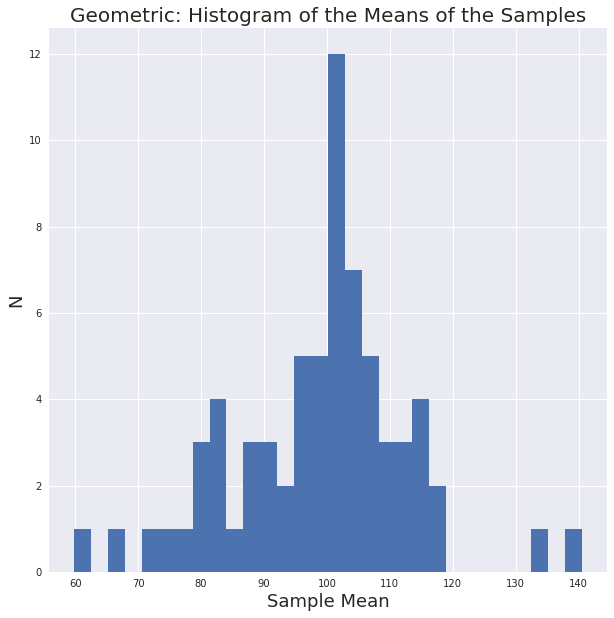

In [172]:
allmeans = list(md['geometric']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Geometric: Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2: This histogram represents the Geometric distribution and showcases the bell shaped curve discussed.

# All Distributions Plotted

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


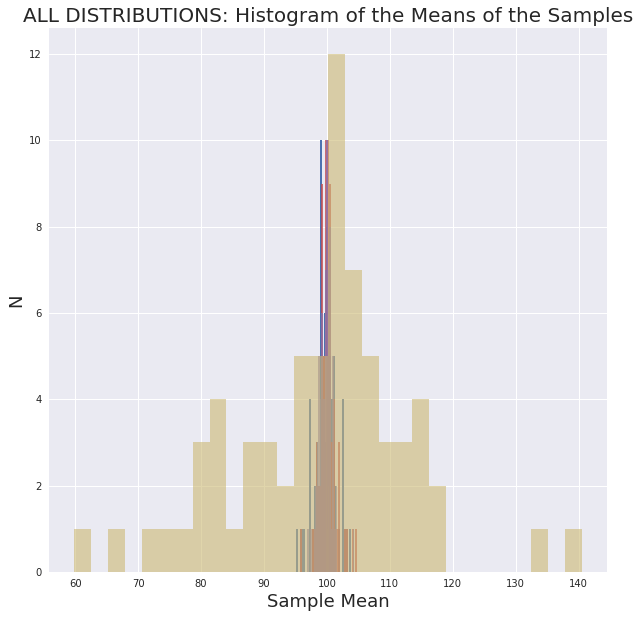

In [173]:
allmeans1 = list(md['chisq']['means'].values())
allmeans2 = list(md['normal']['means'].values())
allmeans3 = list(md['poisson']['means'].values())
allmeans4 = list(md['binomial']['means'].values())
allmeans5 = list(md['geometric']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans1, alpha=1.0, bins=30)
pl.hist(allmeans2, alpha=0.9, bins=30)
pl.hist(allmeans3, alpha=0.8, bins=30)
pl.hist(allmeans4, alpha=0.7, bins=30)
pl.hist(allmeans5, alpha=0.6, bins=30)
pl.title('ALL DISTRIBUTIONS: Histogram of the Means of the Samples', fontsize = 20)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
        




Figure 1: This histogram is an overlayed diagram of all 5 distributions. They generally show a normal distribution which supports the CLT.